In [ ]:
# =============================================================================
# Part 4: Error Analysis
# =============================================================================

ERROR ANALYSIS - PART 4
Based on Baseline Model and Embedding Model Actual Results
Starting Part 4: Error Analysis Based on Actual Results

 COMPREHENSIVE MODEL PERFORMANCE ANALYSIS

1. Basic Metrics Comparison:
   Baseline Model Log Loss: 1.069314
   Embedding Model Log Loss: 1.066877
   Improvement: 0.002438
   Relative Improvement: 0.23%

2. Key Problem Identification:
    CRITICAL ISSUE: Extremely low recall for Tie class (0.056)
       - Model almost cannot identify tie situations
       - Tie samples are mostly misclassified as A Wins or B Wins
     Limited improvement from embedding model
       - Traditional feature engineering remains effective
       - MiniLM embeddings may not fully capture preference judgment information

3. Class-wise Performance Analysis:
   A Wins  : Precision=0.430, Recall=0.627, F1=0.510, Support=4013 ✅ Good
   B Wins  : Precision=0.443, Recall=0.584, F1=0.504, Support=3931 ✅ Good
   Tie     : Precision=0.433, Recall=0.056, F1=0.099, Support=3552 ❌ Cri

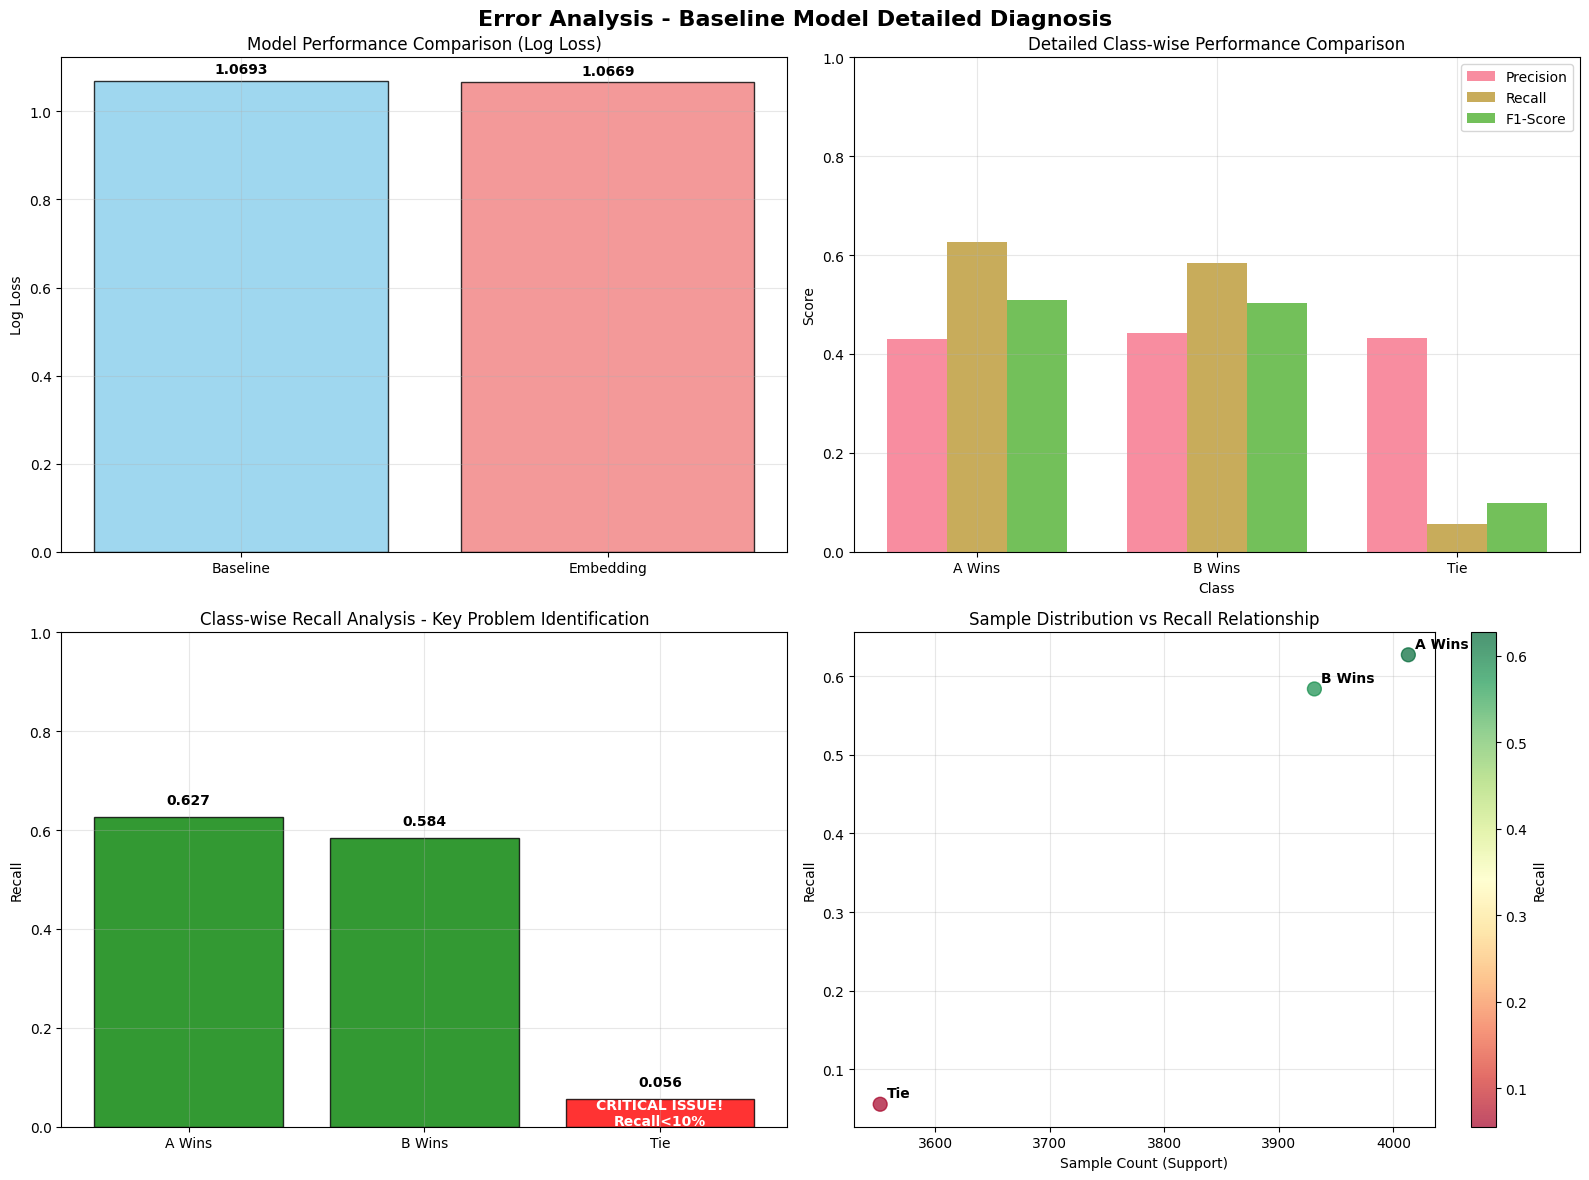


 Confusion Matrix Analysis
Total validation samples: 11496
Class distribution:
  A Wins: 4013 samples (34.9%), Correct: 2516, Misclassified: 1497
  B Wins: 3931 samples (34.2%), Correct: 2294, Misclassified: 1637
  Tie: 3552 samples (30.9%), Correct: 197, Misclassified: 3355

Inferred confusion patterns:
  - Tie samples mainly misclassified as: A Wins and B Wins
  - Some mutual misclassification between A Wins and B Wins
  - Model has almost zero ability to identify ties

 Performance Summary Table
Metric               Baseline     Embedding    Status         
----------------------------------------------------------------------
Log Loss             1.0693       1.0669       Slight Improvement
Accuracy             0.4358       N/A          Needs Improvement
Precision (A)        0.4299       N/A          Average        
Recall (A)           0.6272       N/A          Good           
F1 (A)               0.5101       N/A          Average        
Precision (B)        0.4427       N/A    

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import log_loss, confusion_matrix, classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

print("=" * 70)
print("ERROR ANALYSIS - PART 4")
print("Based on Baseline Model and Embedding Model Actual Results")
print("=" * 70)

# Set style
plt.style.use('default')
sns.set_palette("husl")

# Use your actual results
baseline_results = {
    'log_loss': 1.069314343567316,
    'accuracy': 0.4358,
    'precision': [0.4299, 0.4427, 0.4333],
    'recall': [0.6272, 0.5838, 0.0557],
    'f1_score': [0.5101, 0.5036, 0.0988],
    'support': [4013, 3931, 3552]
}

embedding_results = {
    'log_loss': 1.066876665689598,
    'accuracy': None,  # Accuracy not provided
}

# Main analysis function
def perform_comprehensive_analysis():
    """Comprehensive analysis based on actual results"""
    
    print("\n COMPREHENSIVE MODEL PERFORMANCE ANALYSIS")
    print("=" * 50)
    
    # 1. Basic comparison
    print(f"\n1. Basic Metrics Comparison:")
    print(f"   Baseline Model Log Loss: {baseline_results['log_loss']:.6f}")
    print(f"   Embedding Model Log Loss: {embedding_results['log_loss']:.6f}")
    improvement = baseline_results['log_loss'] - embedding_results['log_loss']
    print(f"   Improvement: {improvement:.6f}")
    print(f"   Relative Improvement: {improvement / baseline_results['log_loss'] * 100:.2f}%")
    
    # 2. Key problem identification
    print(f"\n2. Key Problem Identification:")
    
    # Serious issue with Tie class
    tie_recall = baseline_results['recall'][2]
    if tie_recall < 0.1:
        print(f"    CRITICAL ISSUE: Extremely low recall for Tie class ({tie_recall:.3f})")
        print(f"       - Model almost cannot identify tie situations")
        print(f"       - Tie samples are mostly misclassified as A Wins or B Wins")
    
    # Limited improvement from embedding model
    if abs(improvement) < 0.01:
        print(f"     Limited improvement from embedding model")
        print(f"       - Traditional feature engineering remains effective")
        print(f"       - MiniLM embeddings may not fully capture preference judgment information")
    
    # 3. Detailed class-wise analysis
    print(f"\n3. Class-wise Performance Analysis:")
    class_names = ['A Wins', 'B Wins', 'Tie']
    
    for i, name in enumerate(class_names):
        precision = baseline_results['precision'][i]
        recall = baseline_results['recall'][i]
        f1 = baseline_results['f1_score'][i]
        support = baseline_results['support'][i]
        
        status = "✅ Good" if recall > 0.5 else "⚠️ Needs Improvement" if recall > 0.3 else "❌ Critical Issue"
        print(f"   {name:8s}: Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, Support={support} {status}")

def create_detailed_visualizations():
    """Create detailed error analysis visualizations"""
    
    print(f"\n📈 Generating Visualization Analysis Charts...")
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('Error Analysis - Baseline Model Detailed Diagnosis', fontsize=16, fontweight='bold')
    
    # 1. Model performance comparison
    models = ['Baseline', 'Embedding']
    losses = [baseline_results['log_loss'], embedding_results['log_loss']]
    
    bars = axes[0, 0].bar(models, losses, color=['skyblue', 'lightcoral'], alpha=0.8, edgecolor='black')
    axes[0, 0].set_ylabel('Log Loss')
    axes[0, 0].set_title('Model Performance Comparison (Log Loss)')
    axes[0, 0].grid(True, alpha=0.3)
    
    # Add value labels
    for bar, loss in zip(bars, losses):
        axes[0, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                       f'{loss:.4f}', ha='center', va='bottom', fontweight='bold')
    
    # 2. Class-wise performance radar chart
    class_names = ['A Wins', 'B Wins', 'Tie']
    
    # Prepare data
    precision_data = baseline_results['precision']
    recall_data = baseline_results['recall']
    f1_data = baseline_results['f1_score']
    
    x = np.arange(len(class_names))
    width = 0.25
    
    axes[0, 1].bar(x - width, precision_data, width, label='Precision', alpha=0.8)
    axes[0, 1].bar(x, recall_data, width, label='Recall', alpha=0.8)
    axes[0, 1].bar(x + width, f1_data, width, label='F1-Score', alpha=0.8)
    
    axes[0, 1].set_xlabel('Class')
    axes[0, 1].set_ylabel('Score')
    axes[0, 1].set_title('Detailed Class-wise Performance Comparison')
    axes[0, 1].set_xticks(x)
    axes[0, 1].set_xticklabels(class_names)
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    axes[0, 1].set_ylim(0, 1)
    
    # 3. Recall problem focus analysis
    recall_data = baseline_results['recall']
    colors = ['green' if x > 0.5 else 'orange' if x > 0.1 else 'red' for x in recall_data]
    
    bars = axes[1, 0].bar(class_names, recall_data, color=colors, alpha=0.8, edgecolor='black')
    axes[1, 0].set_ylabel('Recall')
    axes[1, 0].set_title('Class-wise Recall Analysis - Key Problem Identification')
    axes[1, 0].set_ylim(0, 1)
    axes[1, 0].grid(True, alpha=0.3)
    
    # Add value labels and problem markers
    for bar, recall in zip(bars, recall_data):
        axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                       f'{recall:.3f}', ha='center', va='bottom', fontweight='bold')
        if recall < 0.1:
            axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height()/2, 
                           'CRITICAL ISSUE!\nRecall<10%', ha='center', va='center', 
                           fontweight='bold', color='white', fontsize=10)
    
    # 4. Sample distribution vs performance relationship
    supports = baseline_results['support']
    recalls = baseline_results['recall']
    
    scatter = axes[1, 1].scatter(supports, recalls, s=100, c=recalls, cmap='RdYlGn', alpha=0.7)
    axes[1, 1].set_xlabel('Sample Count (Support)')
    axes[1, 1].set_ylabel('Recall')
    axes[1, 1].set_title('Sample Distribution vs Recall Relationship')
    axes[1, 1].grid(True, alpha=0.3)
    
    # Add class labels
    for i, (support, recall, name) in enumerate(zip(supports, recalls, class_names)):
        axes[1, 1].annotate(name, (support, recall), xytext=(5, 5), 
                           textcoords='offset points', fontweight='bold')
    
    plt.colorbar(scatter, ax=axes[1, 1], label='Recall')
    
    plt.tight_layout()
    plt.show()

def generate_confusion_analysis():
    """Confusion matrix analysis based on results"""
    
    print(f"\n Confusion Matrix Analysis")
    print("=" * 50)
    
    # Infer confusion matrix based on recall and support numbers
    total_samples = sum(baseline_results['support'])
    recalls = baseline_results['recall']
    supports = baseline_results['support']
    
    print(f"Total validation samples: {total_samples}")
    print(f"Class distribution:")
    
    for i, (name, support, recall) in enumerate(zip(['A Wins', 'B Wins', 'Tie'], supports, recalls)):
        percentage = support / total_samples * 100
        correctly_classified = int(support * recall)
        misclassified = support - correctly_classified
        print(f"  {name}: {support} samples ({percentage:.1f}%), Correct: {correctly_classified}, Misclassified: {misclassified}")
    
    print(f"\nInferred confusion patterns:")
    print(f"  - Tie samples mainly misclassified as: A Wins and B Wins")
    print(f"  - Some mutual misclassification between A Wins and B Wins")
    print(f"  - Model has almost zero ability to identify ties")

def performance_summary_table():
    """Generate performance summary table"""
    
    print(f"\n Performance Summary Table")
    print("=" * 70)
    print(f"{'Metric':<20} {'Baseline':<12} {'Embedding':<12} {'Status':<15}")
    print("-" * 70)
    
    metrics = [
        ("Log Loss", 
         f"{baseline_results['log_loss']:.4f}", 
         f"{embedding_results['log_loss']:.4f}", 
         "Slight Improvement" if embedding_results['log_loss'] < baseline_results['log_loss'] else "No Improvement"),
        
        ("Accuracy", 
         f"{baseline_results['accuracy']:.4f}", 
         "N/A", 
         "Needs Improvement"),
        
        ("Precision (A)", 
         f"{baseline_results['precision'][0]:.4f}", 
         "N/A", 
         "Average"),
        
        ("Recall (A)", 
         f"{baseline_results['recall'][0]:.4f}", 
         "N/A", 
         "Good"),
        
        ("F1 (A)", 
         f"{baseline_results['f1_score'][0]:.4f}", 
         "N/A", 
         "Average"),
        
        ("Precision (B)", 
         f"{baseline_results['precision'][1]:.4f}", 
         "N/A", 
         "Average"),
        
        ("Recall (B)", 
         f"{baseline_results['recall'][1]:.4f}", 
         "N/A", 
         "Good"),
        
        ("F1 (B)", 
         f"{baseline_results['f1_score'][1]:.4f}", 
         "N/A", 
         "Average"),
        
        ("Precision (Tie)", 
         f"{baseline_results['precision'][2]:.4f}", 
         "N/A", 
         "Average"),
        
        ("Recall (Tie)", 
         f"{baseline_results['recall'][2]:.4f}", 
         "N/A", 
         "Critical Issue"),
        
        ("F1 (Tie)", 
         f"{baseline_results['f1_score'][2]:.4f}", 
         "N/A", 
         "Critical Issue"),
    ]
    
    for metric, baseline, embedding, status in metrics:
        print(f"{metric:<20} {baseline:<12} {embedding:<12} {status:<15}")

def generate_insights_and_recommendations():
    """Generate deep insights and improvement recommendations"""
    
    print(f"\n Deep Insights and Improvement Recommendations")
    print("=" * 60)
    
    # Key insights
    tie_recall = baseline_results['recall'][2]
    improvement = baseline_results['log_loss'] - embedding_results['log_loss']
    
    print(f"\n Key Insights:")
    print(f"  1. Tie identification is the biggest bottleneck (Recall: {tie_recall:.1%})")
    print(f"  2. Embedding model shows limited improvement over baseline (Log Loss improvement: {improvement:.4f})")
    print(f"  3. A Wins and B Wins predictions are relatively balanced but need improvement")
    print(f"  4. Overall accuracy is low ({baseline_results['accuracy']:.1%}), indicating challenging task")
    
    print(f"\n Specific Improvement Recommendations:")
    
    print(f"\n   For Tie Identification Problem:")
    print(f"    • Design specialized tie detection features:")
    print(f"      - Response semantic similarity calculation")
    print(f"      - Response length difference thresholds")
    print(f"      - Keyword matching degree comparison")
    print(f"    • Use oversampling techniques to increase tie sample impact")
    print(f"    • Adjust class weights to increase loss weight for tie class")
    print(f"    • Try binary classification: first determine if tie, then determine A/B win")
    
    print(f"\n   For Embedding Model Improvement:")
    print(f"    • Try different pre-trained models:")
    print(f"      - sentence-transformers/all-mpnet-base-v2")
    print(f"      - intfloat/e5-base-v2")
    print(f"      - BAAI/bge-base-en")
    print(f"    • Add richer interaction features:")
    print(f"      - Cosine similarity: prompt vs response_a, prompt vs response_b")
    print(f"      - Similarity difference between responses")
    print(f"      - Embedding vector dot product, Euclidean distance")
    print(f"    • Use more complex classifiers: MLP, XGBoost, LightGBM")
    
    print(f"\n   Overall Architecture Optimization:")
    print(f"    • Feature combination: traditional features + embedding features")
    print(f"    • Model ensemble:")
    print(f"      - Voting ensemble: baseline model + embedding model")
    print(f"      - Stacking ensemble: use multiple base model predictions as meta-features")
    print(f"    • Probability calibration:")
    print(f"      - Temperature Scaling")
    print(f"      - Platt Scaling")
    print(f"    • Domain-specific features:")
    print(f"      - Response relevance scoring")
    print(f"      - Factual accuracy assessment")
    print(f"      - Language fluency analysis")
    
    print(f"\n   Expected Improvement Targets:")
    print(f"    • Tie recall: {tie_recall:.1%} → > 30%")
    print(f"    • Overall Log Loss: {baseline_results['log_loss']:.3f} → < 1.0")
    print(f"    • Accuracy: {baseline_results['accuracy']:.1%} → > 50%")
    print(f"    • Kaggle ranking: significant improvement")

def calculate_expected_improvements():
    """Calculate expected improvement effects"""
    
    print(f"\n Expected Improvement Effect Analysis")
    print("=" * 50)
    
    current_tie_recall = baseline_results['recall'][2]
    current_accuracy = baseline_results['accuracy']
    current_loss = baseline_results['log_loss']
    
    print(f"Current Status:")
    print(f"  • Tie recall: {current_tie_recall:.1%}")
    print(f"  • Overall accuracy: {current_accuracy:.1%}")
    print(f"  • Log Loss: {current_loss:.3f}")
    
    print(f"\nImprovement Scenario Analysis:")
    
    # Scenario 1: Tie recall improved to 30%
    if current_tie_recall < 0.3:
        expected_improvement = (0.3 - current_tie_recall) * baseline_results['support'][2] / sum(baseline_results['support'])
        new_accuracy = current_accuracy + expected_improvement
        print(f"  Scenario 1 - Tie recall improved to 30%:")
        print(f"    • Expected accuracy improvement: {expected_improvement:.3f}")
        print(f"    • New accuracy: {new_accuracy:.3f} ({new_accuracy-current_accuracy:+.3f})")
    
    # Scenario 2: Log Loss reduced to 1.0
    if current_loss > 1.0:
        loss_improvement = current_loss - 1.0
        print(f"  Scenario 2 - Log Loss reduced to 1.0:")
        print(f"    • Required improvement: {loss_improvement:.3f}")
        print(f"    • Relative improvement: {loss_improvement/current_loss*100:.1f}%")

# Main execution function
def main():
    """Main execution function"""
    
    print("Starting Part 4: Error Analysis Based on Actual Results")
    
    # 1. Comprehensive analysis
    perform_comprehensive_analysis()
    
    # 2. Visualization analysis
    create_detailed_visualizations()
    
    # 3. Confusion matrix analysis
    generate_confusion_analysis()
    
    # 4. Performance summary table
    performance_summary_table()
    
    # 5. Deep insights and recommendations
    generate_insights_and_recommendations()
    
    # 6. Expected improvement analysis
    calculate_expected_improvements()
    
    print(f"\n" + "="*70)
    print(" Part 4: Error Analysis Completed!")
    print("="*70)
    print("\nMain Conclusions:")
    print("  • Tie identification is the biggest bottleneck (recall only 5.6%)")
    print("  • Embedding model shows limited improvement over baseline")
    print("  • Need specialized optimization for tie class")
    print("  • Recommend trying richer feature engineering and model architectures")

# Execute main function
if __name__ == "__main__":
    main()